In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import io
import csv
import sys 

maxInt = sys.maxsize
while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

from implementations_NB05 import*

In [2]:
header_traj_0800_0830, all_lines_0800_0830 = read_traj_csv('data/monday_d8_0800_0830_OD_trajectories.csv')
header_traj_0830_0900, all_lines_0830_0900 = read_traj_csv('data/monday_d8_0830_0900_OD_trajectories.csv')
header_traj_0900_0930, all_lines_0900_0930 = read_traj_csv('data/monday_d8_0900_0930_OD_trajectories.csv')
header_traj_0930_1000, all_lines_0930_1000 = read_traj_csv('data/monday_d8_0930_1000_OD_trajectories.csv')
header_traj_1000_1030, all_lines_1000_1030 = read_traj_csv('data/monday_d8_1000_1030_OD_trajectories.csv')
all_lines1 = all_lines_0800_0830 + all_lines_0830_0900 + all_lines_0900_0930 + all_lines_0930_1000 + all_lines_1000_1030

header_traj_0800_0830, all_lines_0800_0830 = read_traj_csv('data/tuesday_d8_0800_0830_OD_trajectories.csv')
header_traj_0830_0900, all_lines_0830_0900 = read_traj_csv('data/tuesday_d8_0830_0900_OD_trajectories.csv')
header_traj_0900_0930, all_lines_0900_0930 = read_traj_csv('data/tuesday_d8_0900_0930_OD_trajectories.csv')
header_traj_0930_1000, all_lines_0930_1000 = read_traj_csv('data/tuesday_d8_0930_1000_OD_trajectories.csv')
header_traj_1000_1030, all_lines_1000_1030 = read_traj_csv('data/tuesday_d8_1000_1030_OD_trajectories.csv')
all_lines2 = all_lines_0800_0830 + all_lines_0830_0900 + all_lines_0900_0930 + all_lines_0930_1000 + all_lines_1000_1030

header_traj_0830_0900, all_lines_0830_0900 = read_traj_csv('data/wednesday_d8_0830_0900_OD_trajectories.csv')
header_traj_0900_0930_01, all_lines_0900_0930_01 = read_traj_csv('data/wednesday_d8_0900_0930_OD_trajectories_01.csv')
header_traj_0900_0930_02, all_lines_0900_0930_02 = read_traj_csv('data/wednesday_d8_0900_0930_OD_trajectories_02.csv')
header_traj_0930_1000_01, all_lines_0930_1000_01 = read_traj_csv('data/wednesday_d8_0930_1000_OD_trajectories_01.csv')
header_traj_0930_1000_02, all_lines_0930_1000_02 = read_traj_csv('data/wednesday_d8_0930_1000_OD_trajectories_02.csv')
header_traj_1000_1030_01, all_lines_1000_1030_01 = read_traj_csv('data/wednesday_d8_1000_1030_OD_trajectories_01.csv')
header_traj_1000_1030_02, all_lines_1000_1030_02 = read_traj_csv('data/wednesday_d8_1000_1030_OD_trajectories_02.csv')
header_traj_1030_1100, all_lines_1030_1100 = read_traj_csv('data/wednesday_d8_1030_1100_OD_trajectories.csv')
all_lines3 = all_lines_0830_0900 + all_lines_0900_0930_01+all_lines_0900_0930_02 + all_lines_0930_1000_01+all_lines_0930_1000_02 + all_lines_1000_1030_01+all_lines_1000_1030_02+all_lines_1030_1100

header_traj_0800_0830, all_lines_0800_0830 = read_traj_csv('data/thursday_d8_0800_0830_OD_trajectories.csv')
header_traj_0830_0900, all_lines_0830_0900 = read_traj_csv('data/thursday_d8_0830_0900_OD_trajectories.csv')
header_traj_0900_0930, all_lines_0900_0930 = read_traj_csv('data/thursday_d8_0900_0930_OD_trajectories.csv')
header_traj_0930_1000, all_lines_0930_1000 = read_traj_csv('data/thursday_d8_0930_1000_OD_trajectories.csv')
header_traj_1000_1030_01, all_lines_1000_1030_01 = read_traj_csv('data/thursday_d8_1000_1030_OD_trajectories_01.csv')
header_traj_1000_1030_02, all_lines_1000_1030_02 = read_traj_csv('data/thursday_d8_1000_1030_OD_trajectories_02.csv')
all_lines4 = all_lines_0800_0830 + all_lines_0830_0900 + all_lines_0900_0930 + all_lines_0930_1000 + all_lines_1000_1030_01+all_lines_1000_1030_02
all_lines = all_lines1+all_lines2+all_lines3+all_lines4
update_track_id(all_lines)

In [3]:
outputs = pd.read_csv('outputs_from_NN.csv').to_numpy()[:,1:]
#len(outputs)

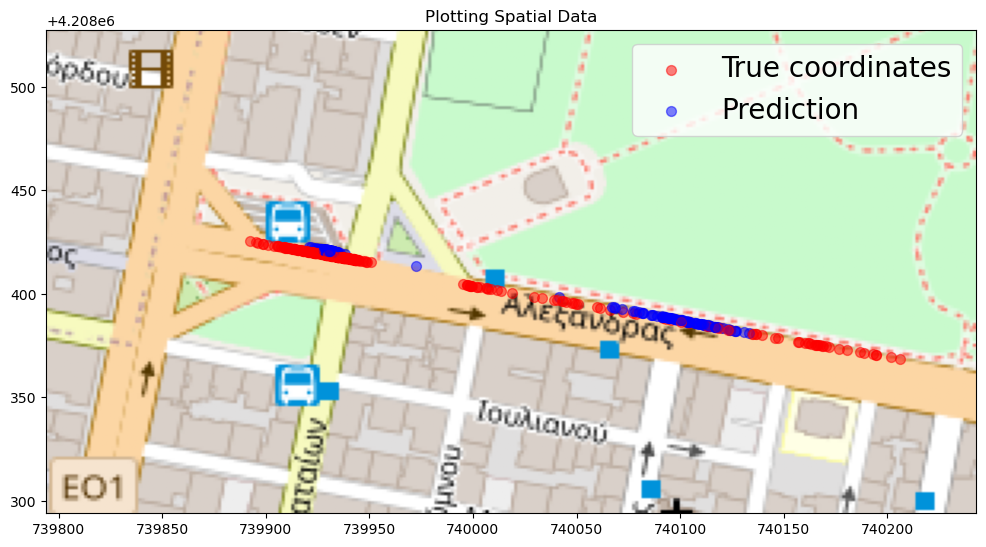

In [8]:
#Plotting in red the true MLC, and blue the predicted MLC

BBox = (739794.025,740243.059,4208293.982,4208527.381)
background = plt.imread('BackgroundMap.png')
fig, ax = plt.subplots(figsize = (12,10))
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(background, zorder=0, extent = BBox, aspect= 'equal')

for ind in range(len(outputs)):
    x_true,y_true,x_pred,y_pred = compare_coo_MLC(all_lines,int(outputs[ind,0]),float(outputs[ind,1]))
    ax.scatter(x_true,y_true, zorder=1, alpha= 0.5, c='r', s=50) #in red : true MLC
    ax.scatter(x_pred,y_pred, zorder=1, alpha= 0.5, c='b', s=50) #in blue : pred MLC
plt.legend(["True coordinates","Prediction"],fontsize=20)
plt.savefig('plots/HeatmapCoo.png')
plt.show()